### Boxplot Project

Summarise the history of the box plot and situations in which it used.
• Demonstrate the use of the box plot using data of your choosing.
• Explain any relevant terminology such as the terms quartile and percentile.
• Compare the box plot to alternatives.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Let's have a look at the meteorological data from the Gurteen met station in Tipperary
df = pd.read_csv("http://cli.met.ie/cli/climate_data/webdata/hly1475.csv", skiprows=17,skip_blank_lines=True, low_memory=False, usecols = [0,4])
df.shape
df.head(2)

,date,temp
0,31-dec-2007 01:00,
1,31-dec-2007 02:00,


In [3]:
df.tail(2)

,date,temp
94270,31-oct-2018 23:00,2.2
94271,01-nov-2018 00:00,1.7


In [4]:
df.dtypes

date    object
temp    object
dtype: object

In [5]:
#Checking for data issues (empty cells) as follows;
df.isnull().sum()

date    0
temp    0
dtype: int64

In [6]:
#We are only interested in the date and temperature columns, however they are returned as 'object' type data, so we must convert to relevant data form.
#First we will look at the date to datetime conversion, and then the temperature to a numeric conversion.
df['Datetime'] = pd.to_datetime(df['date'])
df['Temp'] = pd.to_numeric(df['temp'], errors='coerce')# Important to convert objects to numbers, but this creates another issue regarding 'NaN' cells.
df.head(2)

,date,temp,Datetime,Temp
0,31-dec-2007 01:00,,2007-12-31 01:00:00,NaN
1,31-dec-2007 02:00,,2007-12-31 02:00:00,NaN


In [7]:
#Let's check our cells for any missing data issues!
df.isnull().sum()

date          0
temp          0
Datetime      0
Temp        253
dtype: int64

In [8]:
df.describe()

,Temp
count,94019.000000
mean,9.597338
std,5.281526
min,-13.400000
25%,6.000000
50%,9.900000
75%,13.400000
max,29.700000


In [9]:
#The new column 'Temp' which is now numeric (dtype Int64) contains NaN cells.
#Ok, so we now know (after some extensive testing and research) that we can't plot with 'NaN' cells.  So to deal with this we will insert the average value from the dataset into the 'NaN' data cells  
df.fillna(9.6, inplace=True)

In [10]:
df.isnull().sum()

date        0
temp        0
Datetime    0
Temp        0
dtype: int64

In [11]:
#Now rearrange the columns so that we have Datetime first and eliminate unnecessary noise;
df = df[['Datetime', 'Temp']]
df.head(1)

,Datetime,Temp
0,2007-12-31 01:00:00,9.6


In [12]:
df.tail(2)

,Datetime,Temp
94270,2018-10-31 23:00:00,2.2
94271,2018-11-01 00:00:00,1.7


In [13]:
df.describe()

,Temp
count,94272.000000
mean,9.597345
std,5.274434
min,-13.400000
25%,6.000000
50%,9.800000
75%,13.400000
max,29.700000


In [14]:
#Select the data range from the 1st year of the dataset;
df1 = df.iloc[8087:16847]

In [15]:
#To check the correct starting time for our analysis use;
df1.head(2)

,Datetime,Temp
8087,2009-01-01 00:00:00,3.2
8088,2009-01-01 01:00:00,3.1


In [16]:
#To check the ending time for our analysis;
df1.tail(2)

,Datetime,Temp
16845,2009-12-31 22:00:00,-1.4
16846,2009-12-31 23:00:00,-3.9


In [17]:
#To summarise the metadata we use the following;
df1.describe()

,Temp
count,8760.000000
mean,9.440696
std,5.240999
min,-7.100000
25%,6.000000
50%,9.700000
75%,13.300000
max,25.900000


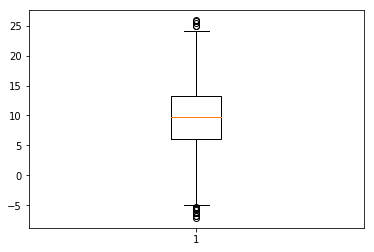

In [18]:
#To visualise the data we use a box plotas follows;
A = plt.boxplot(df1['Temp'])

In [19]:
#Now we will need to look at the data from the next year of our analysis.
#Select the data range from the 2nd year of the dataset;
df2 = df.iloc[16847:25607]

In [20]:
df2.describe()

,Temp
count,8760.000000
mean,8.312032
std,6.609363
min,-13.400000
25%,3.700000
50%,9.000000
75%,13.400000
max,24.500000


In [21]:
df2.head(2)

,Datetime,Temp
16847,2010-01-01 00:00:00,-2.4
16848,2010-01-01 01:00:00,-2.4


In [22]:
df2.tail(1)

,Datetime,Temp
25606,2010-12-31 23:00:00,4.8


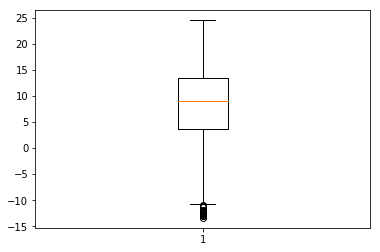

In [23]:
B = plt.boxplot(df2['Temp'])

In [24]:
df3 = df.iloc[25607:34367]
df3.head(2)

,Datetime,Temp
25607,2011-01-01 00:00:00,5.0
25608,2011-01-01 01:00:00,4.8


In [25]:
df3.tail(1)


,Datetime,Temp
34366,2011-12-31 23:00:00,9.0


In [26]:
df3.describe()

,Temp
count,8760.000000
mean,9.718858
std,4.681199
min,-6.100000
25%,6.900000
50%,10.400000
75%,13.000000
max,23.500000


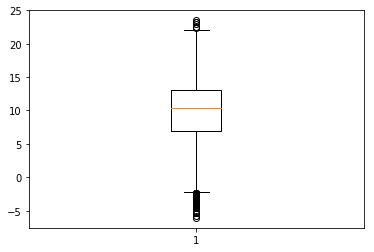

In [27]:
C = plt.boxplot(df3['Temp'])

In [28]:
df4 = df.iloc[34367:43151]
df4.head(2)

,Datetime,Temp
34367,2012-01-01 00:00:00,8.8
34368,2012-01-01 01:00:00,8.6


In [29]:
df4.tail(2)

,Datetime,Temp
43149,2012-12-31 22:00:00,3.5
43150,2012-12-31 23:00:00,3.1


In [30]:
df4.describe()


,Temp
count,8784.000000
mean,9.464526
std,4.649455
min,-4.100000
25%,6.300000
50%,9.400000
75%,12.500000
max,24.500000


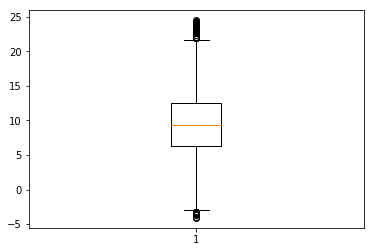

In [31]:
D = plt.boxplot(df4['Temp'])

In [32]:
df5 = df.iloc[43151:51911]
df5.head(2)

,Datetime,Temp
43151,2013-01-01 00:00:00,3.3
43152,2013-01-01 01:00:00,3.5


In [33]:
df5.tail(2)

,Datetime,Temp
51909,2013-12-31 22:00:00,4.6
51910,2013-12-31 23:00:00,4.2


In [34]:
df5.describe()

,Temp
count,8760.000000
mean,9.490251
std,5.696650
min,-6.300000
25%,5.400000
50%,9.400000
75%,13.525000
max,28.400000


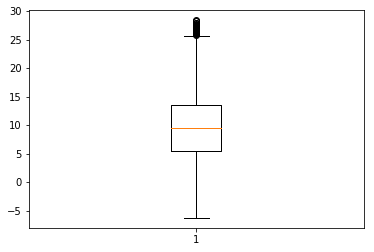

In [35]:
E = plt.boxplot(df5['Temp'])

In [36]:
df6 = df.iloc[51911:60671]
df6.head(2)

,Datetime,Temp
51911,2014-01-01 00:00:00,4.0
51912,2014-01-01 01:00:00,3.8


In [37]:
df6.tail(2)

,Datetime,Temp
60669,2014-12-31 22:00:00,8.7
60670,2014-12-31 23:00:00,8.9


In [38]:
df.describe()

,Temp
count,94272.000000
mean,9.597345
std,5.274434
min,-13.400000
25%,6.000000
50%,9.800000
75%,13.400000
max,29.700000


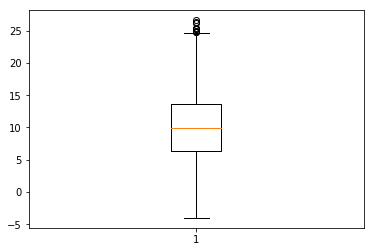

In [39]:
F = plt.boxplot(df6['Temp'])

In [40]:
df7 = df.iloc[60671:69431]
df7.head(2)

,Datetime,Temp
60671,2015-01-01 00:00:00,8.7
60672,2015-01-01 01:00:00,8.7


In [41]:
df7.tail(2)

,Datetime,Temp
69429,2015-12-31 22:00:00,1.1
69430,2015-12-31 23:00:00,-0.5


In [42]:
df7.describe()

,Temp
count,8760.000000
mean,9.419041
std,4.630852
min,-5.900000
25%,6.100000
50%,9.800000
75%,12.800000
max,22.800000


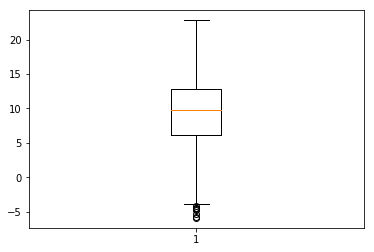

In [43]:
G = plt.boxplot(df7['Temp'])

In [44]:
df8 = df.iloc[69431:78215]
df8.head(2)

,Datetime,Temp
69431,2016-01-01 00:00:00,1.3
69432,2016-01-01 01:00:00,2.1


In [45]:
df8.tail(2)

,Datetime,Temp
78213,2016-12-31 22:00:00,7.4
78214,2016-12-31 23:00:00,5.7


In [46]:
df8.describe()

,Temp
count,8784.000000
mean,9.642771
std,5.264676
min,-5.400000
25%,5.700000
50%,9.700000
75%,13.600000
max,27.200000


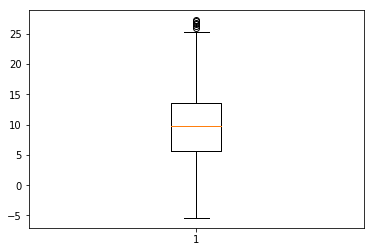

In [47]:
H = plt.boxplot(df8['Temp'])

In [48]:
df9 = df.iloc[78215:86951]
df9.head(2)

,Datetime,Temp
78215,2017-01-01 00:00:00,5.4
78216,2017-01-01 01:00:00,5.1


In [49]:
df9.tail(2)

,Datetime,Temp
86949,2017-12-30 22:00:00,7.8
86950,2017-12-30 23:00:00,10.0


In [50]:
df9.describe()

,Temp
count,8736.000000
mean,10.044792
std,4.793516
min,-6.000000
25%,6.900000
50%,10.500000
75%,13.400000
max,24.500000


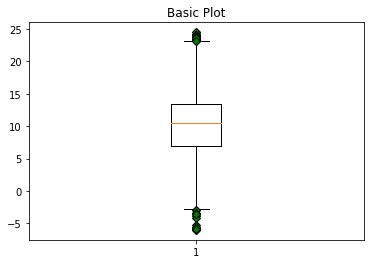

In [84]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1,ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df9['Temp'],flierprops = green_diamond);

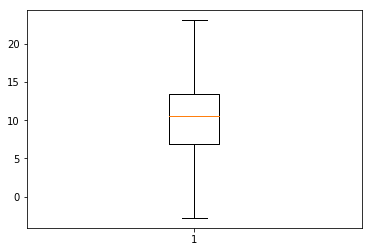

In [86]:

I = plt.boxplot(df9['Temp'], showfliers = False)


In [58]:
datasets = [(df1['Temp']),(df2['Temp']),(df3['Temp']),(df4['Temp']),(df5['Temp']),(df6['Temp']),(df7['Temp']),(df8['Temp']),(df9['Temp'])]

Text(0,0.5,'exp')

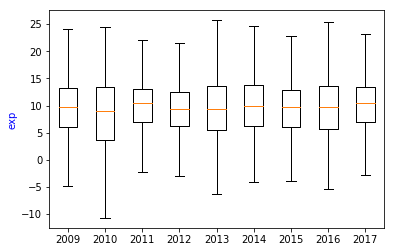

In [95]:
plt.boxplot(datasets,0, showfliers=False,); #use semi-colon after the function to eliminate unnecessary code outputs
plt.xticks([1, 2, 3,4,5,6,7,8,9], ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']);
plt.ylabel('exp',color='b')